CHANGING THE FILE FROM TXT TO CSV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('power_consum.csv')

C:\Users\vinoth kanna\AppData\Local\Temp\ipykernel_12788\1482122521.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('power_consum.csv')


In [3]:
df.shape
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.head(20)
df.describe()
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()
df.shape
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

Changeing the column data type to apporopriate data type

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075259 entries, 0 to 2075258
Series name: Time
Non-Null Count    Dtype         
--------------    -----         
2075259 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.8 MB


In [7]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')   
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')


CHECKING FOR NULL VALUES

In [8]:
df.isnull().sum()
#abart from the Date and Time columns, all other columns have null values whith same number of rows


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

FEATURE ENGINEERING


In [10]:
#CREATING A COPY OF THE DATAFRAME
#This is done to avoid changing the original dataframe
df_copy=df.copy()
df_copy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
#CHANGING THE DATATYPE OF THE COLUMNS TO BE MORE EFFICIENT
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S')
df_copy['Global_active_power'] = pd.to_numeric(df_copy['Global_active_power'], errors='coerce')
df_copy['Global_reactive_power'] = pd.to_numeric(df_copy['Global_reactive_power'], errors='coerce')
df_copy['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')   
df_copy['Global_intensity'] = pd.to_numeric(df_copy['Global_intensity'], errors='coerce')
df_copy['Sub_metering_1'] = pd.to_numeric(df_copy['Sub_metering_1'], errors='coerce')
df_copy['Sub_metering_2'] = pd.to_numeric(df_copy['Sub_metering_2'], errors='coerce')
df_copy['Sub_metering_3'] = pd.to_numeric(df_copy['Sub_metering_3'], errors='coerce')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 156.3 MB


In [12]:
#CRAETING NEW FEATURES FROM EXISTING ONES
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df_copy["Date"].dt.month

In [13]:
df_copy['daily_avg_power'] = df_copy.groupby('Date')['Global_active_power'].transform('mean')
df_copy['peak_hours'] = df_copy['Global_active_power'] > df_copy['daily_avg_power']
df_copy.head()
df['rolling_avg'] = df['Global_active_power'].rolling(window=60).mean()

In [14]:
df_copy["rolling_avg"]=df_copy["Global_active_power"].fillna(method='ffill')
df_copy.head()

C:\Users\vinoth kanna\AppData\Local\Temp\ipykernel_15392\1852834718.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy["rolling_avg"]=df_copy["Global_active_power"].fillna(method='ffill')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,daily_avg_power,peak_hours,rolling_avg
0,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,3.053475,True,4.216
1,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,3.053475,True,5.360
2,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,3.053475,True,5.374
3,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,3.053475,True,5.388
4,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,3.053475,True,3.666


In [15]:
df_copy["peak_hours"].value_counts()

peak_hours
False    1224965
True      824315
Name: count, dtype: int64

In [16]:
df_copy["Sub_metering"]=df_copy["Sub_metering_1"]+df_copy["Sub_metering_2"]+df_copy["Sub_metering_3"]

In [17]:
#Target variable 
a = (df_copy['Global_active_power']*1000/60) 
b = df_copy['Sub_metering_1'] + df_copy['Sub_metering_2'] + df_copy['Sub_metering_3']
df_copy['power_consumption'] = a - b

DELETION OF LESS USEFUL COLUMNS

In [18]:
df_copy.drop(columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)
df_copy.drop(columns=['Date', 'Time'], inplace=True)

In [19]:
df_copy['peak_hours'] = df_copy['peak_hours'].astype(int)

In [20]:
df_copy['power_consumption'] = df_copy['power_consumption'].clip(lower=0)

In [21]:
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,4.216,0.418,234.84,18.4,2006,12,3.053475,1,4.216,18.0,52.266667
1,5.360,0.436,233.63,23.0,2006,12,3.053475,1,5.360,17.0,72.333333
2,5.374,0.498,233.29,23.0,2006,12,3.053475,1,5.374,19.0,70.566667
3,5.388,0.502,233.74,23.0,2006,12,3.053475,1,5.388,18.0,71.800000
4,3.666,0.528,235.68,15.8,2006,12,3.053475,1,3.666,18.0,43.100000


YEAR WISE POWER CONSUMPTION 

In [22]:
df_year=pd.DataFrame(df_copy.groupby('Year')['power_consumption'].sum())

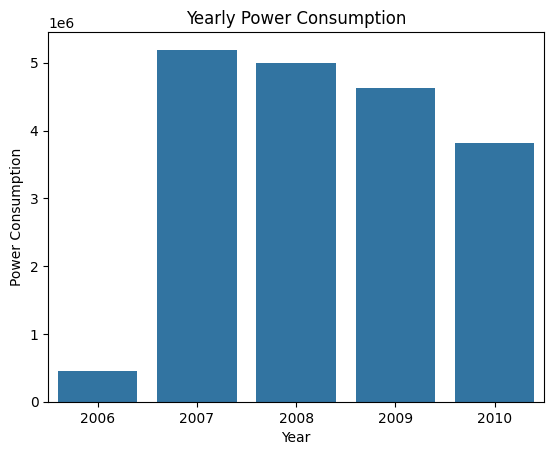

In [23]:
sns.barplot(x='Year',y='power_consumption',data=df_year)
plt.title('Yearly Power Consumption')
plt.xlabel('Year')
plt.ylabel('Power Consumption')
plt.show()

#FINDINGS  


1.SIZE OF 2006 IS SMALL BECAUSE IT HAS ONLY DECEMBER MONTH OF DATA                                                                                    
2.THE YEAR 2007 IS HEIGHEST IN THE PLOT 
3.THE YEAR 2010 IS SMALLEST IN THE GRAPH
4.THE YEAR 2010 HAS ONLY 11 MONTHS

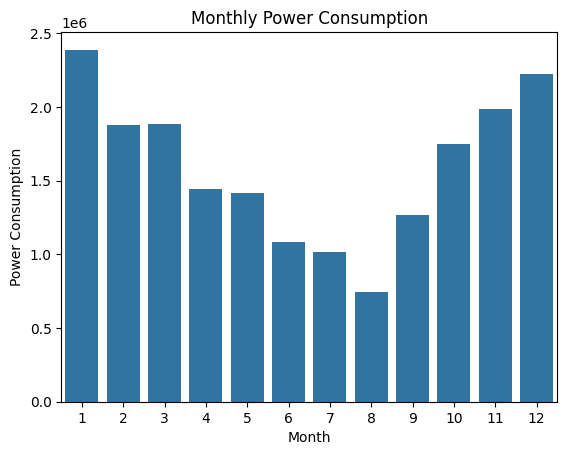

In [24]:
df_month=pd.DataFrame(df_copy.groupby('Month')['power_consumption'].sum())
sns.barplot(x='Month',y='power_consumption',data=df_month)
plt.title('Monthly Power Consumption')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.show()

1.IN THIS PLOT JANURAY MONTH IS HEIGHER COMPARING WITH OTHERS,
BECAUSE IN FRANCE "JANVIR" IS THE HEART OF WINTER,DUE TO THE LOW TEMPERATURE HOUSEHOLD PEOPLE TURN TO ELECTRICALLY POWERED HEATER'S

2.THE MONTHS THAT HAVE LOW POWER CONSUMPTION ARE ARIL , MAY , JUNE , JULY ,AUGEST 
THE REASON BEHIND THE LOW CONSUMPTION IS IN FRANCE APRIL MARKS THE STARTING OF AUTUMN SEASON WHICH GIVES WARM WEATHER  
AFTER MAY IT'S THE SUMMER SEASON WITH WARM WEATHER AND FRESH AIR

3.IN THE MONTH AUGUST THE FRENCH PEOPLE TAKE  VACATIONS DUE TO THE SUMMER SEASON AND WARM WEATHER VISE VERSIA LOW CONSUMPTION

4.FROM OCTOBER TO DECEMBER THE AUTUMN AND SUMMER SEASON ENDS AND RAINFALL AND WINTER SEASON STARTS SO PEOPLE DENT TO BE INDOORS MOST OF THE TIME HENCE THE HEIGHER POWER CONSUMPTION

DISTRIBUTION OF THE DATA 

Global_active_power


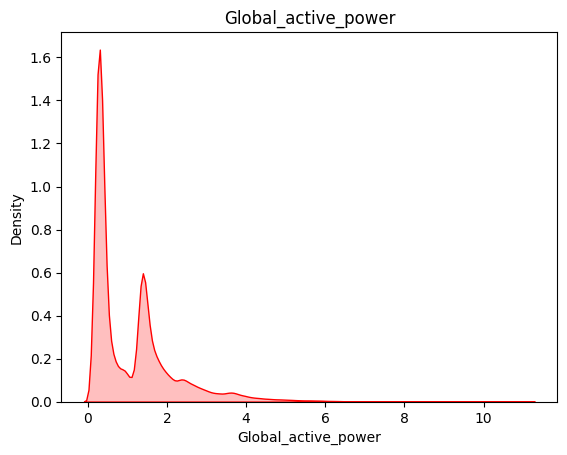

Global_reactive_power


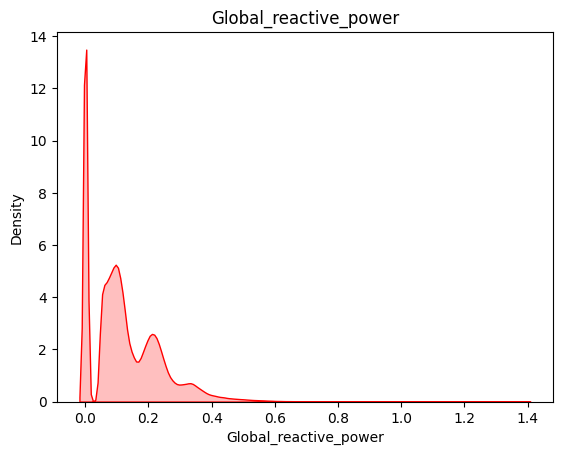

Voltage


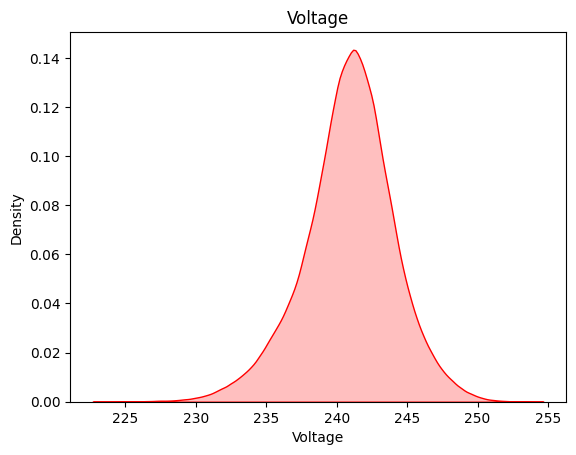

Global_intensity


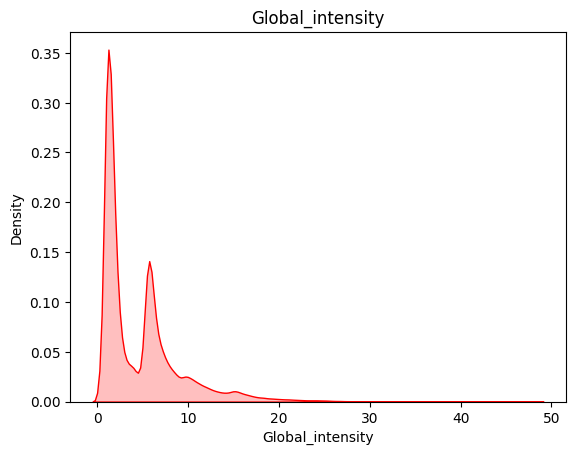

Year


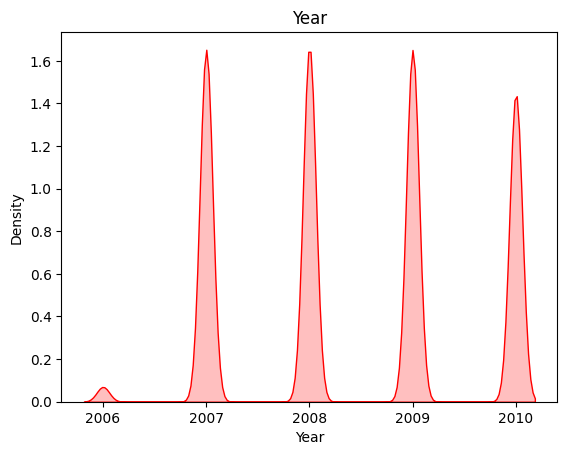

Month


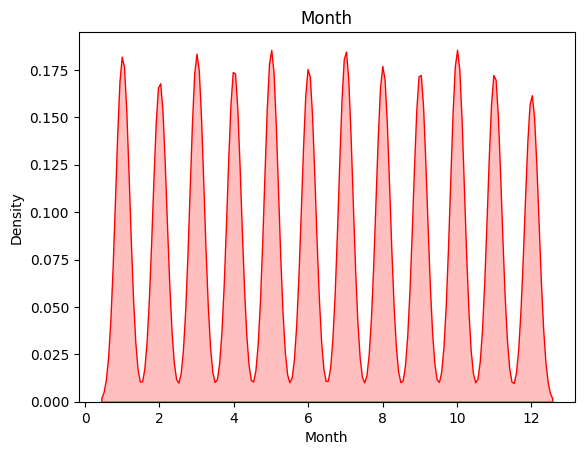

daily_avg_power


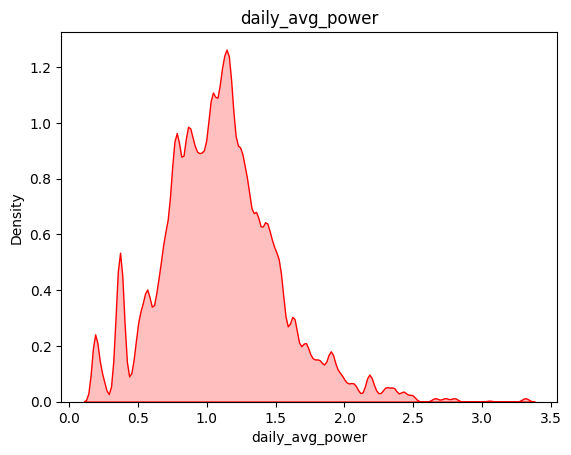

peak_hours


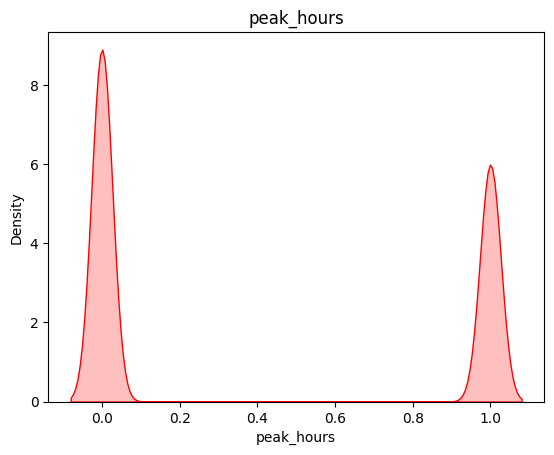

rolling_avg


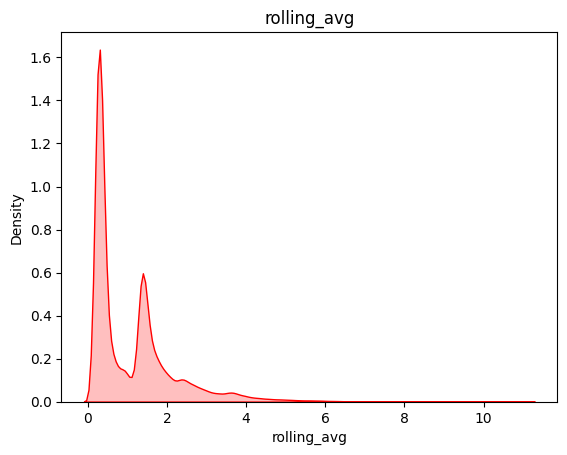

Sub_metering


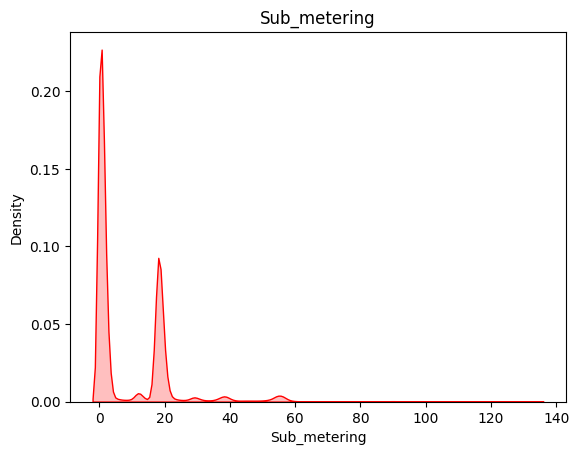

power_consumption


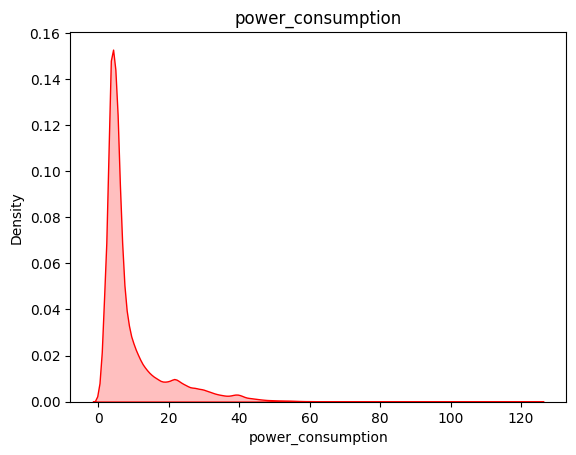

In [25]:
for i in df_copy.columns:
    print(i)
    sns.kdeplot(df_copy[i], fill=True, color='red')
    plt.title(i)
    plt.show()
    plt.Figure(figsize=(5, 5))

CHECKING FOR OUTLIERS 

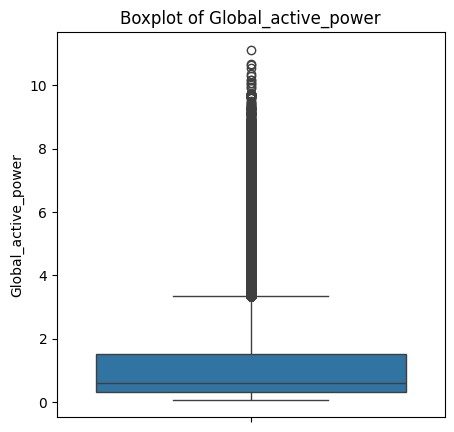

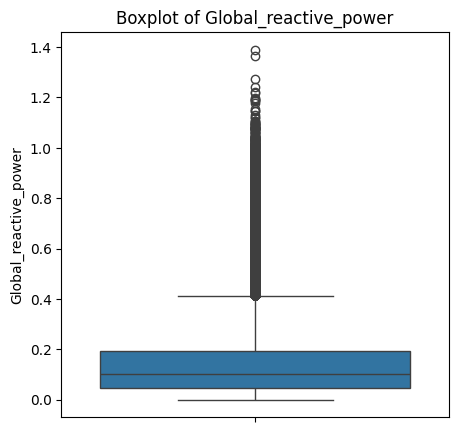

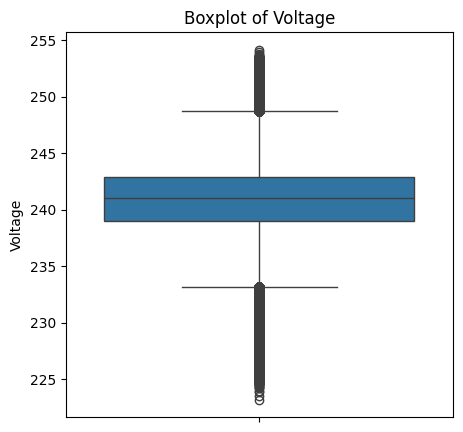

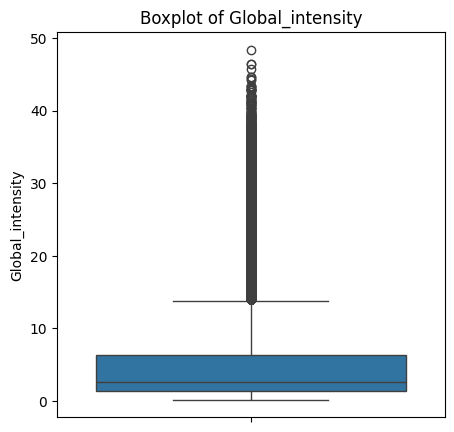

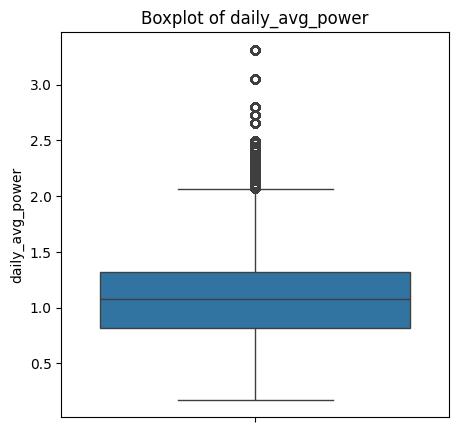

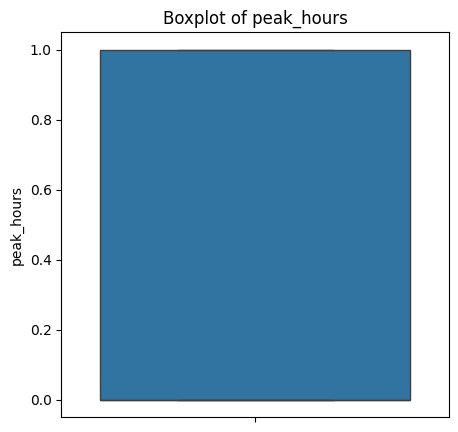

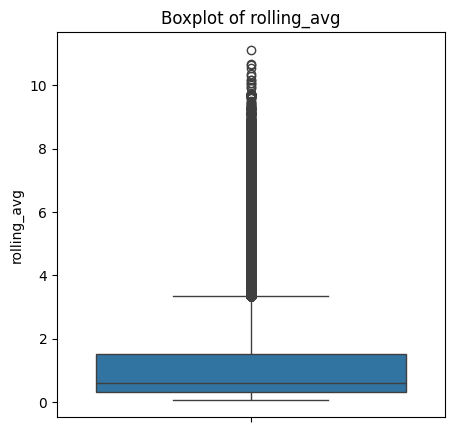

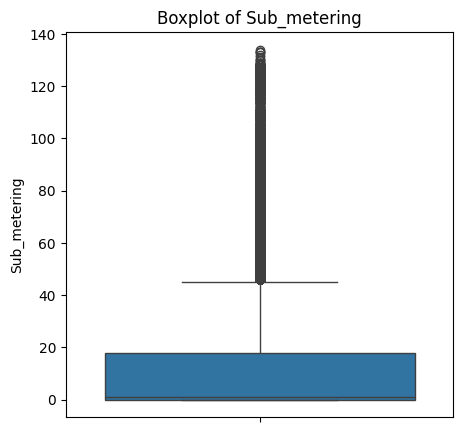

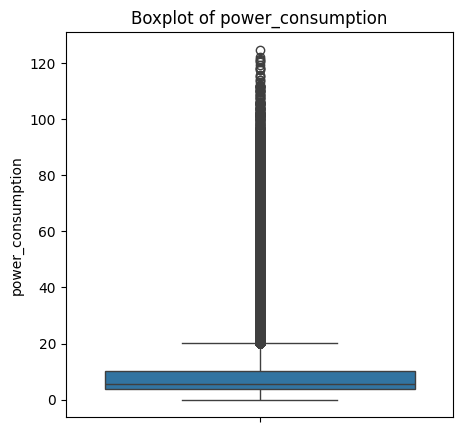

In [26]:
# Only plot boxplots for continuous (numeric) features
for col in df_copy.select_dtypes(include=['float64', 'int64']).columns:
    
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df_copy, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

WE ARE SEEING HIGH AMOUNT OF OUTLIERS in IN DATA, BECAUSE THE POWER CONSUMPTION IS DIFFERENT IN  DAILY USEAGE AND WEEKEND TIMES 

STANDARTIZATION

In [27]:
from sklearn.preprocessing import StandardScaler

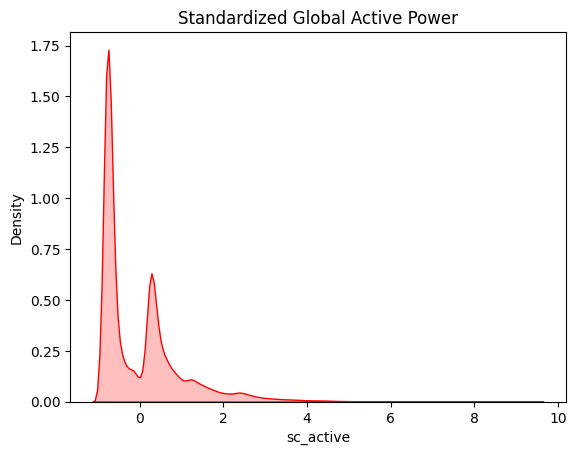

In [28]:
sc=StandardScaler()
df_copy["sc_active"]=sc.fit_transform(df_copy[["Global_active_power"]])
sns.kdeplot(df_copy["sc_active"], fill=True, color='red')
plt.title("Standardized Global Active Power")
plt.show()

In [29]:
df_copy["Global_active_power"]=df_copy["sc_active"]
df_copy.drop(columns=["sc_active"], inplace=True)
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,0.418,234.84,18.4,2006,12,3.053475,1,4.216,18.0,52.266667
1,4.037085,0.436,233.63,23.0,2006,12,3.053475,1,5.360,17.0,72.333333
2,4.050326,0.498,233.29,23.0,2006,12,3.053475,1,5.374,19.0,70.566667
3,4.063567,0.502,233.74,23.0,2006,12,3.053475,1,5.388,18.0,71.800000
4,2.434881,0.528,235.68,15.8,2006,12,3.053475,1,3.666,18.0,43.100000


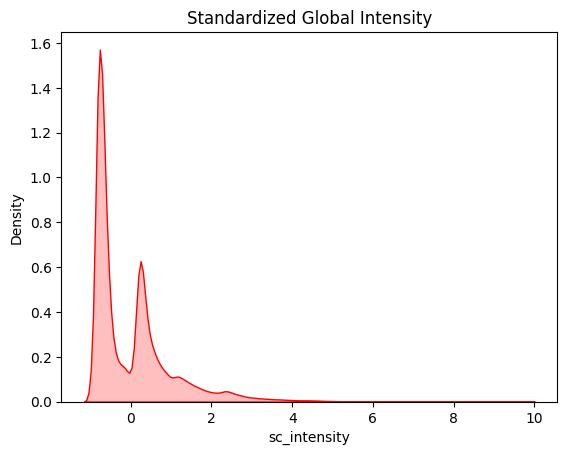

In [30]:
df_copy["sc_intensity"]=sc.fit_transform(df_copy[["Global_intensity"]])
sns.kdeplot(df_copy["sc_intensity"], fill=True, color='red')
plt.title("Standardized Global Intensity")
plt.Figure(figsize=(5, 5))
plt.show()

In [31]:
df_copy["Global_intensity"]=df_copy["sc_intensity"]
df_copy.drop(columns=["sc_intensity"], inplace=True)
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,0.418,234.84,3.098789,2006,12,3.053475,1,4.216,18.0,52.266667
1,4.037085,0.436,233.63,4.133800,2006,12,3.053475,1,5.360,17.0,72.333333
2,4.050326,0.498,233.29,4.133800,2006,12,3.053475,1,5.374,19.0,70.566667
3,4.063567,0.502,233.74,4.133800,2006,12,3.053475,1,5.388,18.0,71.800000
4,2.434881,0.528,235.68,2.513782,2006,12,3.053475,1,3.666,18.0,43.100000


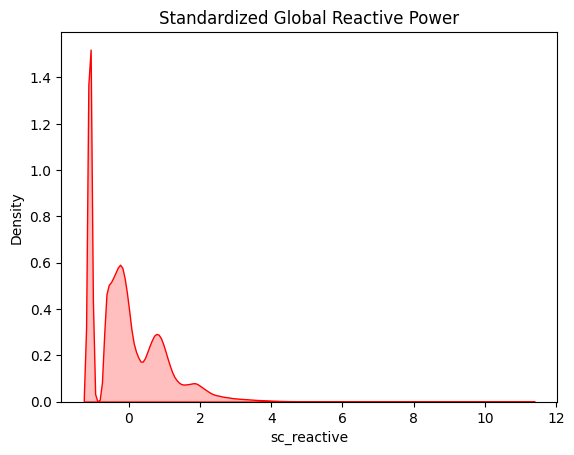

In [32]:
df_copy["sc_reactive"]=sc.fit_transform(df_copy[["Global_reactive_power"]])
sns.kdeplot(df_copy["sc_reactive"], fill=True, color='red')
plt.title("Standardized Global Reactive Power")
plt.Figure(figsize=(5, 5))
plt.show()

In [33]:
df_copy["Global_reactive_power"]=df_copy["sc_reactive"]
df_copy.drop(columns=["sc_reactive"], inplace=True)
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,2.610721,234.84,3.098789,2006,12,3.053475,1,4.216,18.0,52.266667
1,4.037085,2.770406,233.63,4.133800,2006,12,3.053475,1,5.360,17.0,72.333333
2,4.050326,3.320432,233.29,4.133800,2006,12,3.053475,1,5.374,19.0,70.566667
3,4.063567,3.355917,233.74,4.133800,2006,12,3.053475,1,5.388,18.0,71.800000
4,2.434881,3.586573,235.68,2.513782,2006,12,3.053475,1,3.666,18.0,43.100000


Text(0.5, 1.0, 'Standardized Voltage')

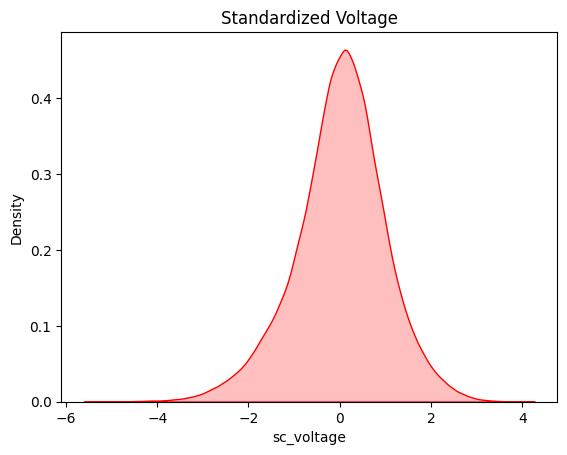

In [34]:
df_copy["sc_voltage"]=sc.fit_transform(df_copy[["Voltage"]])
sns.kdeplot(df_copy["sc_voltage"], fill=True, color='red')
plt.title("Standardized Voltage")

In [35]:
df_copy["Voltage"]  = df_copy["sc_voltage"]
df_copy.drop(columns=["sc_voltage"], inplace=True)

Text(0.5, 1.0, 'Standardized Sub Metering')

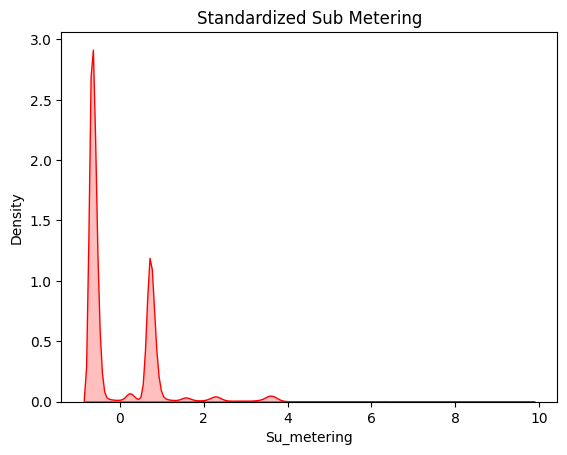

In [36]:
df_copy["Su_metering"]=sc.fit_transform(df_copy[["Sub_metering"]])
sns.kdeplot(df_copy["Su_metering"], fill=True, color='red')
plt.title("Standardized Sub Metering")

In [37]:
df_copy["Sub_metering"]=df_copy["Su_metering"]
df_copy.drop(columns=["Su_metering"], inplace=True)

Text(0.5, 1.0, 'Standardized Daily Average Power')

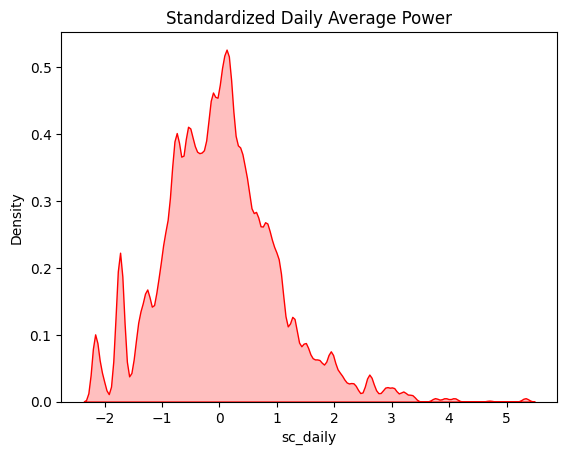

In [38]:
df_copy["sc_daily"]=sc.fit_transform(df_copy[["daily_avg_power"]])
sns.kdeplot(df_copy["sc_daily"], fill=True, color='red')
plt.title("Standardized Daily Average Power")

In [39]:
df_copy["daily_avg_power"]=df_copy["sc_daily"]
df_copy.drop(columns=["sc_daily"], inplace=True)
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,2.610721,-1.851816,3.098789,2006,12,4.700965,1,4.216,0.709097,52.266667
1,4.037085,2.770406,-2.225274,4.133800,2006,12,4.700965,1,5.360,0.631354,72.333333
2,4.050326,3.320432,-2.330213,4.133800,2006,12,4.700965,1,5.374,0.786839,70.566667
3,4.063567,3.355917,-2.191324,4.133800,2006,12,4.700965,1,5.388,0.709097,71.800000
4,2.434881,3.586573,-1.592556,2.513782,2006,12,4.700965,1,3.666,0.709097,43.100000


Text(0.5, 1.0, 'Standardized Rolling Average')

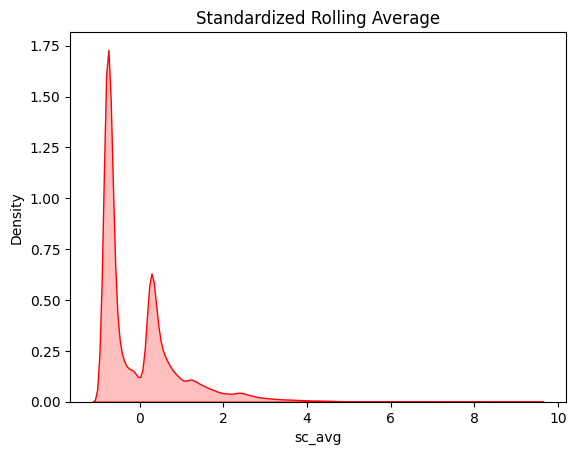

In [40]:
df_copy["sc_avg"]=sc.fit_transform(df_copy[["rolling_avg"]])
sns.kdeplot(df_copy["sc_avg"], fill=True, color='red')
plt.Figure(figsize=(5, 5))
plt.title("Standardized Rolling Average")

In [41]:
df_copy["rolling_avg"]=df_copy["sc_avg"]
df_copy.drop(columns=["sc_avg"], inplace=True)
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,2.610721,-1.851816,3.098789,2006,12,4.700965,1,2.955077,0.709097,52.266667
1,4.037085,2.770406,-2.225274,4.133800,2006,12,4.700965,1,4.037085,0.631354,72.333333
2,4.050326,3.320432,-2.330213,4.133800,2006,12,4.700965,1,4.050326,0.786839,70.566667
3,4.063567,3.355917,-2.191324,4.133800,2006,12,4.700965,1,4.063567,0.709097,71.800000
4,2.434881,3.586573,-1.592556,2.513782,2006,12,4.700965,1,2.434881,0.709097,43.100000


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Year,Month,daily_avg_power,peak_hours,rolling_avg,Sub_metering,power_consumption
0,2.955077,2.610721,-1.851816,3.098789,2006,12,4.700965,1,2.955077,0.709097,4.480793
1,4.037085,2.770406,-2.225274,4.133800,2006,12,4.700965,1,4.037085,0.631354,6.574176
2,4.050326,3.320432,-2.330213,4.133800,2006,12,4.700965,1,4.050326,0.786839,6.389875
3,4.063567,3.355917,-2.191324,4.133800,2006,12,4.700965,1,4.063567,0.709097,6.518538
4,2.434881,3.586573,-1.592556,2.513782,2006,12,4.700965,1,2.434881,0.709097,3.524514


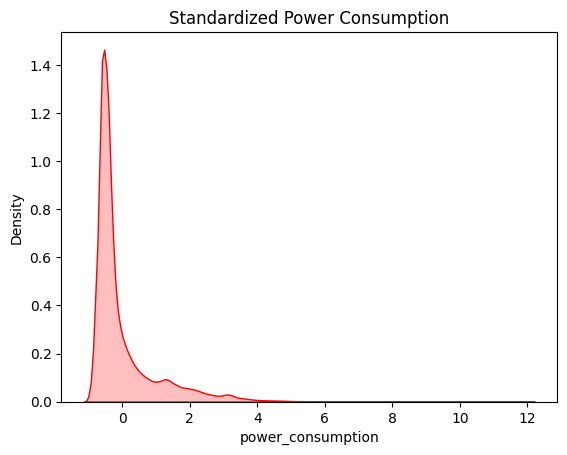

In [42]:
df_copy["power_consumption"]=sc.fit_transform(df_copy[["power_consumption"]])
sns.kdeplot(df_copy["power_consumption"], fill=True, color='red')
plt.title("Standardized Power Consumption")
df_copy.head()

In [43]:
df_copy.head()
df_copy.shape

(2049280, 11)

CORRELATION OF FEATURES

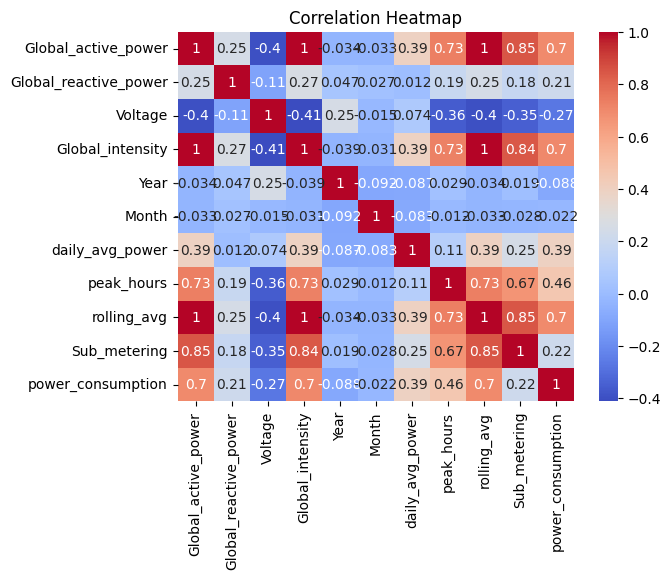

In [47]:
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
#SAVING THE CLEANED DATAFRAME
#This is done to avoid changing the original dataframe
df_copy.to_csv('power_consumption_cleaned.csv', index=False)

NOW WE MOVING INTO MACHINE LEARNING MODEL